# Rachel Ward - DAV 5400 

## Week 10 Assignment

In this assignment I will be tidying, transforming, and performing preliminary analysis on a small set of airlines information.

### Task 1:
Load the data into a CSV file and upload that CSV file to GitHub.  There is no code to show for this task.

### Task 2:
First I will import numpy, and pandas. I will then read the file in using Panda's read csv function.

Then I will tidy and transform the data which I will describe further below. 

In [1]:
#first import pandas
import pandas as pd

#import numpy just in case
import numpy as np

#Then read the file into a dataframe called airlines
filename = "https://raw.githubusercontent.com/rachelward617/DAV-5400/master/UntidyDataRLWUSE.csv"
airlines = pd.read_csv(filename, thousands= ',')

#make sure the data loaded properly
airlines

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,Alaska,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM West,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


Now I will rename the unnamed columns, remove the row that contains all null values, and fill in the null values for the first column using ffill.

In [4]:
#rename the columns
airlines.rename(columns={"Unnamed: 0": "Airline", "Unnamed: 1": "Status"}, inplace = True)

#remove the row that contains all NULL values
airlines = airlines.dropna(how='all')

#forward fill the null values
airlinescleaner = airlines.ffill()

#check results
airlinescleaner

,Airline,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,Alaska,on time,497.0,221.0,212.0,503.0,1841.0
1,Alaska,delayed,62.0,12.0,20.0,102.0,305.0
3,AM West,on time,694.0,4840.0,383.0,320.0,201.0
4,AM West,delayed,117.0,415.0,65.0,129.0,61.0


Now I will use the melt function to make the data frame into long format.

In [6]:
#use the melt function to begin the process of making the data frame into a long format
airlineslong = pd.melt(airlinescleaner, id_vars=['Airline', 'Status'], value_vars=['Los Angeles','Phoenix','San Diego','San Francisco', 'Seattle'])

#show results
airlineslong

,Airline,Status,variable,value
0,Alaska,on time,Los Angeles,497.0
1,Alaska,delayed,Los Angeles,62.0
2,AM West,on time,Los Angeles,694.0
3,AM West,delayed,Los Angeles,117.0
4,Alaska,on time,Phoenix,221.0
5,Alaska,delayed,Phoenix,12.0
6,AM West,on time,Phoenix,4840.0
7,AM West,delayed,Phoenix,415.0
8,Alaska,on time,San Diego,212.0
9,Alaska,delayed,San Diego,20.0


Now that the data is mostly in long format, I will perform a few final tidying and transforming tasks.

I will first move the data into a pivot table format, then I will reset the index to prevent a multi index. Then I will rename the columns and show the results.

In [22]:
#create a pivot table
pivoted =  airlineslong.pivot_table('value', ['Airline', 'variable'], 'Status')

#reset theindex to prevent multiindex
pivoted.reset_index(drop=False, inplace=True ) 

#name the columns
pivoted.reindex(['Airline', 'variable', 'On Time', 'Delayed'], axis=1) 

#rename the columns of the data frame
pivoted.rename(columns={ "variable": "City"}, inplace = True)

#show results
pivoted

Status,Airline,City,delayed,on time
0,AM West,Los Angeles,117.0,694.0
1,AM West,Phoenix,415.0,4840.0
2,AM West,San Diego,65.0,383.0
3,AM West,San Francisco,129.0,320.0
4,AM West,Seattle,61.0,201.0
5,Alaska,Los Angeles,62.0,497.0
6,Alaska,Phoenix,12.0,221.0
7,Alaska,San Diego,20.0,212.0
8,Alaska,San Francisco,102.0,503.0
9,Alaska,Seattle,305.0,1841.0


### Task 3:

"Using your reshaped/transformed data, perform analysis to compare the arrival delays for the two airlines."

**Questions:**

1. For each city, which airline had the best on time performance?;
2. Which airline had the best overall on time performance?

To answer the two above questions I will first create additional columns and add them to the data frame. I will create calculated columns for total number of flights and percent on time.

Then I will create smaller data frames to more easily analyze the results, and show visualizations of the results. 

In [23]:
#first I will make a copy of the pivoted data frame
pivotedplus=pivoted.copy()

#now I will add a column that is total flights- delayed + on time
pivotedplus['Total_Flights']=pivotedplus['delayed']+pivotedplus['on time']

#now I will add another column that is percent of on time flights - on time / total flights
pivotedplus['Percent_On_Time']=pivotedplus['on time']/pivotedplus['Total_Flights']

#display results
pivotedplus.head()

Status,Airline,City,delayed,on time,Total_Flights,Percent_On_Time
0,AM West,Los Angeles,117.0,694.0,811.0,0.855734
1,AM West,Phoenix,415.0,4840.0,5255.0,0.921028
2,AM West,San Diego,65.0,383.0,448.0,0.854911
3,AM West,San Francisco,129.0,320.0,449.0,0.712695
4,AM West,Seattle,61.0,201.0,262.0,0.767176


**Question 1 Approach**

Now that we have the extra information created above, I will create a smaller data frame containing only city, airline, and percent on time information. I will transform this data into a pivot table so that we can easily compare the percentage of on time flights per city. 

In [27]:
#create a new DataFrame with the airlines, cities, and percent on time
bycity = pivotedplus[['City','Airline','Percent_On_Time']].copy()

#show results
bycity.head()

Status,City,Airline,Percent_On_Time
0,Los Angeles,AM West,0.855734
1,Phoenix,AM West,0.921028
2,San Diego,AM West,0.854911
3,San Francisco,AM West,0.712695
4,Seattle,AM West,0.767176


In [28]:
#create a pivot table of the above information to swap the Airline into a column
pivotedbycity =  bycity.pivot_table('Percent_On_Time', ['City'], 'Airline')

#reset theindex to prevent multiindex
pivotedbycity.reset_index(drop=False, inplace=True ) 

#show results
pivotedbycity

Airline,City,AM West,Alaska
0,Los Angeles,0.855734,0.889088
1,Phoenix,0.921028,0.948498
2,San Diego,0.854911,0.913793
3,San Francisco,0.712695,0.831405
4,Seattle,0.767176,0.857875


**Question 1: For each city, which airline had the best on time performance?**

**Results**

I chose to look at percentage of on time flights for this analysis rather than number of on time flights because some airlines had a very large number of flights for certain cities. By looking at the percentage I helped ensure that the results are not as skewed.

As demonstrated in the table directy above, for each of the five cities, Alaska Airlines had the highest percentage of on time flights. 

**Question 2 Approach**

To answer this question I will create a smaller data frame containing only the unique airlines and their average percentage of on time flights across all cities. I will then use a visualization to show this information and answer the question.

In [24]:
#Create a new Data Frame with the unique airlines and the mean percent on time
OnTimeFrame = pivotedplus.groupby('Airline',as_index=False)['Percent_On_Time'].mean()

#Display results
OnTimeFrame

Status,Airline,Percent_On_Time
0,AM West,0.822308
1,Alaska,0.888132


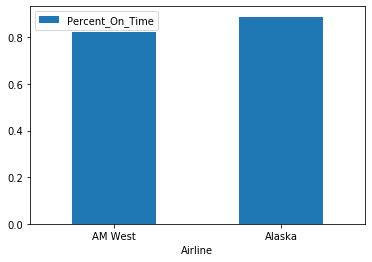

In [29]:
#graph a bar chart showing this data in a visualization
OnTimebarchart = OnTimeFrame.plot.bar(x='Airline', y ='Percent_On_Time',rot=0)

#return the results without the autogenerated code
OnTimebarchart;

**Question 2: Which airline had the best overall on time performance?**

**Results**

The graph and table above shows the average percent of on time flights for Alaska airlines is higher than that of AM West. For Alaska Airline, 88.8% of flights to these five cities were on time on average, compared to AM West Airline, for which only 82.2% of flights to these five cities were on time on average. 

### Task 4

For this task I will transform the data into a format for presentation. To do so I will re-use one of the data frames from above and transform it into a pivot table, this time allowing for the multi index. This will create a short data set that will fit entirely on one page but also be easy to read.

In [30]:
#create a pivot table
presframe =  airlineslong.pivot_table('value', ['Airline', 'variable'], 'Status')

#show results
presframe

Status                 delayed  on time
Airline variable                       
AM West Los Angeles      117.0    694.0
        Phoenix          415.0   4840.0
        San Diego         65.0    383.0
        San Francisco    129.0    320.0
        Seattle           61.0    201.0
Alaska  Los Angeles       62.0    497.0
        Phoenix           12.0    221.0
        San Diego         20.0    212.0
        San Francisco    102.0    503.0
        Seattle          305.0   1841.0